#1.3: Linear Regression

###Key Concepts:


*   QR decomposition
*   Least-squares problems
*   Linear Regression





##1.3.1: QR Decomposition

QR decomposition is a factorization of a matrix
𝐴 into two matrices 𝑄 and 𝑅: $𝐴 = 𝑄𝑅$
where:

* 𝑄 is an orthogonal matrix (i.e., $𝑄^𝑇𝑄=𝐼$, meaning the columns of
𝑄are orthonormal).
* 𝑅 is an upper triangular matrix.

This decomposition is particularly useful in solving linear systems, least-squares problems, and for simplifying matrix calculations.

####Example####
Consider a matrix 𝐴. The goal is to decompose it into 𝑄 and 𝑅 and visualize how the matrix is broken down into orthonormal columns (from
𝑄) and an upper triangular form (from 𝑅).

**Define Matrix 𝐴 And Perform QR Decomposition**


In [15]:
import numpy as np
from numpy.linalg import qr

# Define a 3x3 matrix A
A = np.array([[1, 2, 4],
              [3, 8, 14],
              [2, 6, 13]])

# Perform QR decomposition
Q, R = qr(A)

# Print the resulting matrices Q and R
print("Matrix A:\n", A)
print("\nOrthogonal Matrix Q:\n", Q)
print("\nUpper Triangular Matrix R:\n", R)


Matrix A:
 [[ 1  2  4]
 [ 3  8 14]
 [ 2  6 13]]

Orthogonal Matrix Q:
 [[-0.26726124  0.77151675  0.57735027]
 [-0.80178373  0.15430335 -0.57735027]
 [-0.53452248 -0.6172134   0.57735027]]

Upper Triangular Matrix R:
 [[ -3.74165739 -10.15592719 -19.24280942]
 [  0.          -0.9258201   -2.7774603 ]
 [  0.           0.           1.73205081]]


**Visualizing Matrix 𝐴 And Its Components**

This code visualizes matrix 𝐴, the orthogonal matrix
𝑄, and the upper triangular matrix 𝑅 using heatmaps.

The colors in the heatmaps help identify the structure of each matrix, showing how 𝐴 is transformed into orthonormal columns in 𝑄 and upper triangular form in 𝑅.

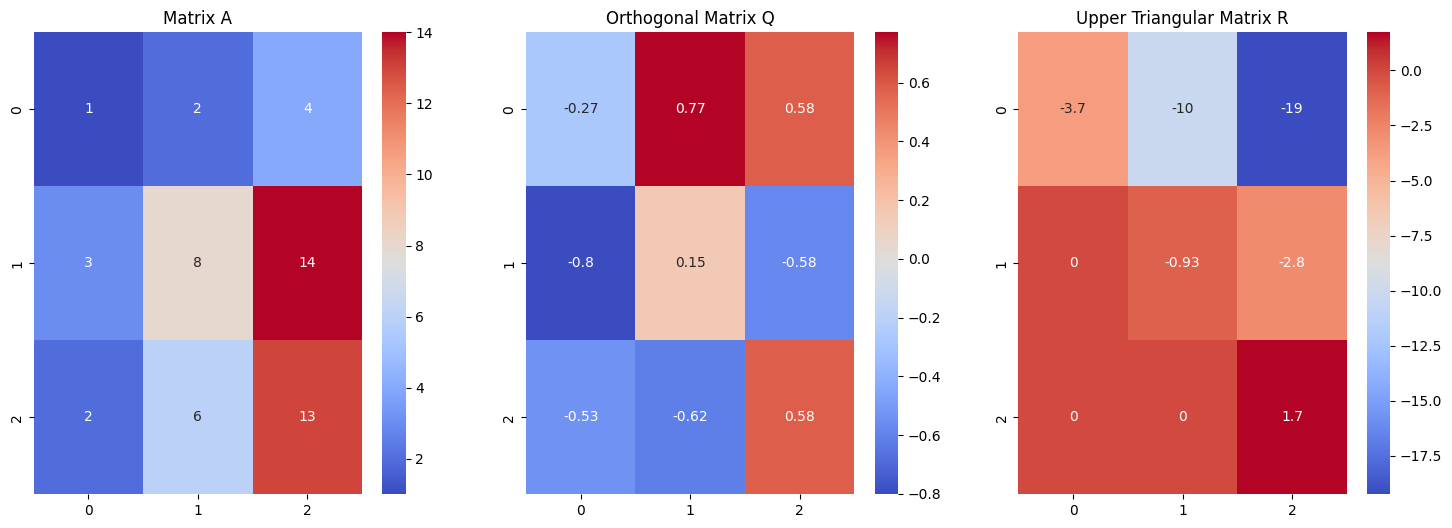

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for each matrix
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot matrix A
sns.heatmap(A, annot=True, cmap='coolwarm', ax=axs[0])
axs[0].set_title('Matrix A')

# Plot matrix Q
sns.heatmap(Q, annot=True, cmap='coolwarm', ax=axs[1])
axs[1].set_title('Orthogonal Matrix Q')

# Plot matrix R
sns.heatmap(R, annot=True, cmap='coolwarm', ax=axs[2])
axs[2].set_title('Upper Triangular Matrix R')

plt.show()


**Geometric Interpretation**

QR decomposition geometrically transforms the column vectors of
𝐴 into orthonormal vectors (from 𝑄). These orthonormal vectors span the same space as the original column vectors of 𝐴, but they are now perpendicular and have unit length.

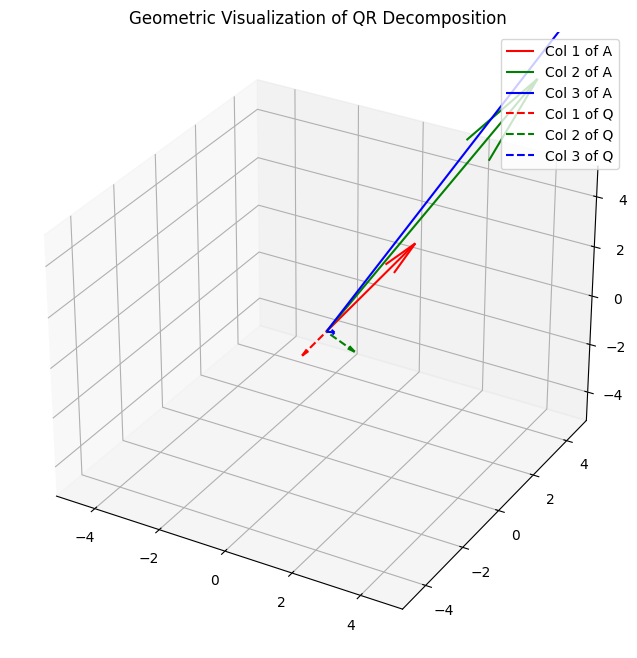

In [20]:
# Visualize the column vectors of A and Q in 3D space
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot vectors from A
ax.quiver(0, 0, 0, A[0, 0], A[1, 0], A[2, 0], color='r', label='Col 1 of A')
ax.quiver(0, 0, 0, A[0, 1], A[1, 1], A[2, 1], color='g', label='Col 2 of A')
ax.quiver(0, 0, 0, A[0, 2], A[1, 2], A[2, 2], color='b', label='Col 3 of A')

# Plot vectors from Q
ax.quiver(0, 0, 0, Q[0, 0], Q[1, 0], Q[2, 0], color='r', linestyle='dashed', label='Col 1 of Q')
ax.quiver(0, 0, 0, Q[0, 1], Q[1, 1], Q[2, 1], color='g', linestyle='dashed', label='Col 2 of Q')
ax.quiver(0, 0, 0, Q[0, 2], Q[1, 2], Q[2, 2], color='b', linestyle='dashed', label='Col 3 of Q')

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])
ax.set_title('Geometric Visualization of QR Decomposition')
ax.legend()
plt.show()


## 1.3.2: Least Squares Problems

In least-squares problems, the goal is to find the best-fit solution to an over-determined system $𝐴𝑥= 𝑏$ by minimizing the residual:

$minimize∥𝐴𝑥−𝑏∥^2$

QR decomposition can be used to solve least-squares problems by transforming the system into one that is easier to solve.



####Example####
Consider an over-determined system of linear equations where there are more equations than unknowns.

**Define Matrix 𝐴 and Vector 𝑏**

In [21]:
# Define the matrix A (3 equations, 2 unknowns)
A = np.array([[1, 1], [1, 2], [1, 3]])
b = np.array([1, 2, 2.5])

# Perform QR decomposition
Q, R = qr(A)

# Compute the least-squares solution
x_ls = np.linalg.inv(R).dot(Q.T).dot(b)

print("Least-Squares Solution:\n", x_ls)


Least-Squares Solution:
 [0.33333333 0.75      ]


The least-squares solution minimizes the squared residuals, providing the best-fit solution when an exact solution may not exist.

**Visualizing the Data and the Best-Fit Line**

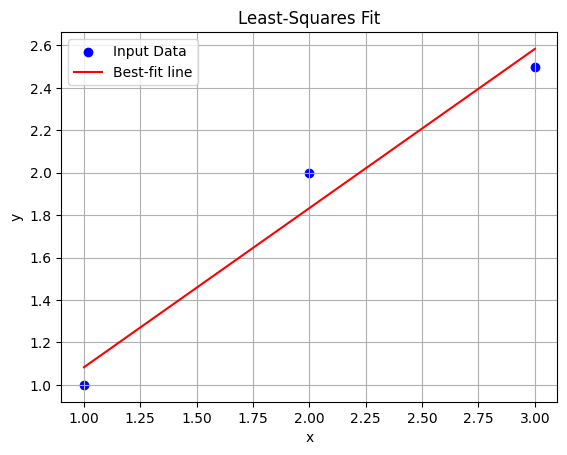

In [23]:
# Plot the data points and the least-squares fit
plt.scatter(A[:, 1], b, color='blue', label='Input Data')

# Plot the least-squares fit line
plt.plot(A[:, 1], A.dot(x_ls), color='red', label='Best-fit line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least-Squares Fit')
plt.legend()
plt.grid(True)
plt.show()


The best-fit line minimizes the sum of squared differences between the observed points and the line, showing how the least-squares solution approximates the data.


## 1.3.3: Linear Regression

Linear regression is a statistical method used to model the relationship between a dependent variable 𝑦 and one/more independent variables 𝑋

The aim is to find the hyperplane that minimizes the residual sum of squares between the observed and predicted values.

The linear regression model can be written as:
$𝑦=𝑋𝛽 + 𝜖$ where:

*   𝑦 is the vector of observed values
*   𝑋 is the matrix of input variables
* 𝛽 is the vector of coefficients
* 𝜖 is the error term.

####Example####
Consider a simple linear regression problem where we want to model the relationship between an independent variable 𝑋 and a dependent variable 𝑦.

**Defining the Input Matrix 𝑋 and the Output Vector 𝑦**

In [24]:
# Define the input matrix X and output vector y
X = np.array([1, 2, 3, 4, 5])
y = np.array([2.1, 4.2, 6.3, 8.1, 10.5])

# Add bias term (column of ones) to X for the intercept
X_b = np.c_[np.ones((5, 1)), X]  # X_b is now a 5x2 matrix

# Compute the linear regression solution using the normal equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(f"Intercept: {theta_best[0]}, Slope: {theta_best[1]}")


Intercept: 0.030000000000005217, Slope: 2.0700000000000007


The input matrix
$𝑋_𝑏$ includes a bias (intercept) term, allowing for the calculation of both the slope and intercept of the best-fit line.

The normal equation is used to compute the regression coefficients
𝛽, which include the intercept and slope.

**Visualizing the Data and the Regression Line**

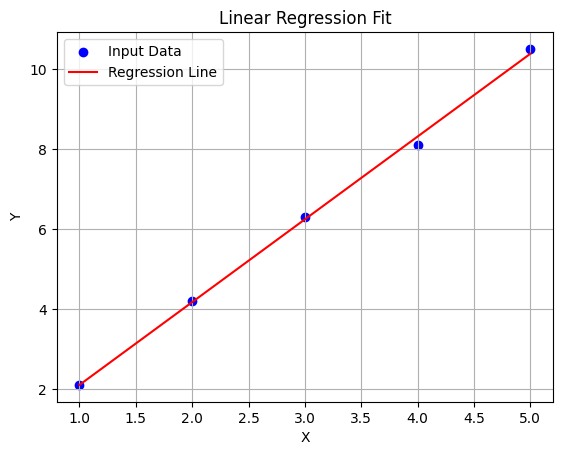

In [26]:
# Plot the data points
plt.scatter(X, y, color='blue', label='Input Data')

# Plot the regression line
plt.plot(X, X_b.dot(theta_best), color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()


This plot shows how the regression line approximates the data, highlighting the relationship between 𝑋 and 𝑦.

**Visualizing Residuals**

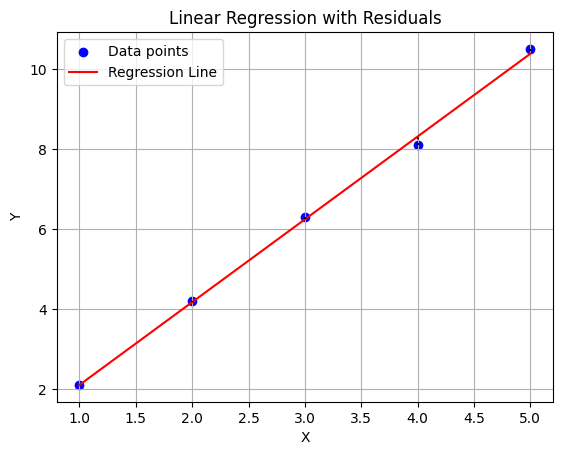

In [27]:
# Calculate the residuals
residuals = y - X_b.dot(theta_best)

# Plot the data points and regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, X_b.dot(theta_best), color='red', label='Regression Line')

# Plot the residuals as vertical lines
for i in range(len(X)):
    plt.vlines(X[i], y[i], X_b.dot(theta_best)[i], color='black', linestyle='dotted')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with Residuals')
plt.legend()
plt.grid(True)
plt.show()


The black dotted lines represent the residuals, which are the vertical distances between the observed data points and the predicted values from the regression model.

Linear regression aims to minimize these residuals, providing the best possible fit to the data.